In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys  
sys.path.insert(0, r'C:\Users\Rodrigo\Desktop\PhD\Study1\Physiological_Data')

In [17]:
import warnings
from Signals_Processing import *
from Process import *
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import ensemble, feature_selection
import pickle

In [18]:
os.chdir('C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\')
os.getcwd()

'C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system'

In [19]:
import csv
with open("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P0\\signals.csv", 'r') as file:
    csv_file = csv.DictReader(file)

In [25]:
csv_data = (pd.read_csv("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P0\\signals.csv"))
csv_dict = csv_data.to_dict()

In [30]:
for key in csv_dict.keys():
    print(csv_dict[key].keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,

In [45]:
"""Load Data from Folder"""

# folder = os.getcwd() + "\\Training Models\\"
participant = "P1_testing"
path = folder + participant
path

'C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P1_testing'

In [46]:
df_baseline = pd.read_csv(r'C:\Users\Rodrigo\Desktop\PhD\loop-system\Training Models\P1\baseline.csv', sep=";", index_col=0)

In [47]:
EEG_baseline = pd.read_csv(r'C:\Users\Rodrigo\Desktop\PhD\loop-system\Training Models\P1\EEGbaseline.csv', sep=";", index_col=0)

In [48]:
imp = pickle.load(open("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P1\\imp.pkl", "rb"))
scaler = pickle.load(open("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P1\\scaler.pkl", "rb"))
rfe = pickle.load(open("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P1\\rfe.pkl", "rb"))
model = pickle.load(open("C:\\Users\\Rodrigo\\Desktop\\PhD\\loop-system\\Training Models\\P1\\model.pkl", "rb"))

In [49]:
df_baseline

,Avg HR,Min HR,Max HR,SD,AVG RR,Minimum RR,Maximum RR,SDNN,RMSSD,NN50,...,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_nn20,RRV_nn50,RRV_pNN50,RRV_pNN20,RRV_HF,RRV_SD1
0,72.593745,61.852234,81.076577,3.811659,0.828842,0.740041,0.970054,44.3959,44.1428,71,...,0.197814,329.0,31.1346,0.094634,33.0,13.0,24.528302,62.264151,0.077291,46.337528


In [50]:
EEG_baseline

,EEG_1_alpha,EEG_1_betha,EEG_1_gamma,EEG_1_theta,EEG_2_alpha,EEG_2_betha,EEG_2_gamma,EEG_2_theta,EEG_3_alpha,EEG_3_betha,...,EEG_30_gamma,EEG_30_theta,EEG_31_alpha,EEG_31_betha,EEG_31_gamma,EEG_31_theta,EEG_32_alpha,EEG_32_betha,EEG_32_gamma,EEG_32_theta
0,-0.000002,8.937561e-07,1.767429e-07,0.000022,-0.000042,0.000016,0.000005,0.000126,-5.412693e-07,6.839352e-07,...,0.000001,0.000015,-4.919552e-07,6.081151e-08,1.740094e-08,0.000001,-0.000006,1.149581e-07,1.353377e-07,0.000001


In [51]:
os.chdir(path)
(
    users,
    EEG_epochs,
    EEG_filtered,
    Signals_epochs,
    Signals,
    EEG_dict,
    features_signals,
    features_EEG,
    features_epochs,
    features_epochs_EEG,
) = ({}, {}, {}, {}, {}, {}, {}, {}, {}, {})

for root, dirs, files in os.walk(path):
    for fname in files:
        if fname.endswith(".xdf"):
            users[fname] = Run_files(fname)

In [52]:
users

{'P1_testing.xdf': [{'info': defaultdict(list,
               {'name': ['PsychoPy Ratings'],
                'type': ['Ratings'],
                'channel_count': ['2'],
                'channel_format': ['string'],
                'source_id': ['Example'],
                'nominal_srate': ['0.000000000000000'],
                'version': ['1.100000000000000'],
                'created_at': ['70829.67177770000'],
                'uid': ['6fd532ff-688f-498a-942e-2e1845466eea'],
                'session_id': ['default'],
                'hostname': ['DESKTOP-8HVM7BE'],
                'v4address': [None],
                'v4data_port': ['16574'],
                'v4service_port': ['16574'],
                'v6address': [None],
                'v6data_port': ['16574'],
                'v6service_port': ['16574'],
                'desc': [None],
                'stream_id': 3,
                'effective_srate': 0}),
   'footer': {'info': defaultdict(list,
                {'first_timestamp'

In [53]:
Opensignals_fs = 100
EEG_fs = 250
resolution = 16

In [54]:
sensors = ["ECG", "EDA", "RESP"]
data = {}
for user in users.keys():
    data[user.split(".")[0]] = Load_Data(
        users[user],
        "OpenSignals",
        "openvibeSignal",
        "PsychoPy Markers",
        "PsychoPy Markers",
        sensors,
    )

    data[user.split(".")[0]]["Markers"].pop(0)
    data[user.split(".")[0]]["Markers"].pop(-1)
    data[user.split(".")[0]]["Markers Timestamps"].pop(0)
    data[user.split(".")[0]]["Markers Timestamps"].pop(-1)

onset, offset, videos, valence, arousal = ({}, {}, {}, {}, {})
for user in data.keys():
    valence[user] = data[user]["Valence"]
    arousal[user] = data[user]["Arousal"]
    onset[user], offset[user], videos[user] = getMarkers(
        data[user]["Markers"], data[user]["Markers Timestamps"]
    )

onset_index = {}
offset_index = {}
onset_index_EEG = {}
offset_index_EEG = {}

for user in data.keys():
    onset_index[user], offset_index[user] = getMarkersIndex(
        onset[user], offset[user], data[user]["Signals"]["Time"]
    )
    onset_index_EEG[user], offset_index_EEG[user] = getMarkersIndex(
        onset[user], offset[user], np.array(data[user]["EEG"]["Time"])
    )

events_diff = {}

for keys in onset.keys():
    events_diff[keys] = CalculateEventsDiff(onset[keys], offset[keys])

In [55]:
"""EEG Processing"""

EEG_filtered = filterEEG(data, EEG_fs)
EEG_filtered = getEEGChannels(EEG_filtered)
EEG_epochs = getEpochs(EEG_filtered, onset_index_EEG, events_diff, EEG_fs)
EEG_dict = getVideosDict(EEG_epochs, videos)
features_EEG = getEEGBands(EEG_dict, EEG_fs)

In [56]:
features_EEG

{'P1_testing': {'EMDB/Horror/1008.avi': {'EEG_1': {'alpha': 2.1808193048116404e-05,
    'betha': 1.2681779296493477e-05,
    'gamma': 4.465641977053662e-06,
    'theta': 8.229441084636188e-05},
   'EEG_2': {'alpha': 0.00018662030162147337,
    'betha': 0.0001225797205573625,
    'gamma': 4.132000327458775e-05,
    'theta': 0.00042662002669751015},
   'EEG_3': {'alpha': 6.956402210681585e-06,
    'betha': 6.161926349044952e-06,
    'gamma': 2.9072756750616852e-06,
    'theta': 1.4750991762886242e-05},
   'EEG_4': {'alpha': 1.8453125355670994e-05,
    'betha': 1.2547014807651706e-05,
    'gamma': 4.568897837071094e-06,
    'theta': 2.7564703281193158e-05},
   'EEG_5': {'alpha': 1.9760423370548618e-05,
    'betha': 1.1078507121746388e-05,
    'gamma': 4.070663741990134e-06,
    'theta': 2.2626958298160555e-05},
   'EEG_6': {'alpha': 3.276614974312787e-05,
    'betha': 3.154670468940184e-05,
    'gamma': 1.555774926479954e-05,
    'theta': 4.733801587862919e-05},
   'EEG_7': {'alpha': 0.00

In [57]:
EEG_list = EEG_baseline.loc[0].values.flatten().tolist()

In [58]:
Signals_epochs = getSignalsEpochs(data, onset_index, events_diff, Opensignals_fs)
Signals = getVideosDict(Signals_epochs, videos)
features_signals = getFeatures(Signals, Opensignals_fs, resolution)

In [59]:
columns = list()
category, video = [], []

for key in features_epochs_EEG.keys():
    user = key
    print(user)
videos = list(features_EEG[user].keys())
for epochs in features_EEG[user][videos[0]].keys():
    for bands in features_EEG[user][videos[0]][epochs].keys():
        columns.append(epochs + "_" + bands)
df_EEG = pd.DataFrame(columns=columns)

for users in features_EEG.keys():
    temp_df = pd.DataFrame(columns=columns)

    for i, videos in enumerate(features_EEG[users].keys()):
        if videos != "baseline":
            temp_list = list()
            for channel in features_EEG[users][videos].keys():
                for band in features_EEG[users][videos][channel].keys():
                    temp_list.append(
                        features_EEG[users][videos][channel][band]
                    )
            temp_df.loc[i] = list(np.array(temp_list)-np.array(EEG_list))
            category.append(videos.split("/")[1])
            video.append(videos.split("/")[2])

    df_EEG = pd.concat([df_EEG, temp_df], ignore_index=True)
df_EEG["Category"] = category
df_EEG["Video"] = video

In [60]:
df_EEG

,EEG_1_alpha,EEG_1_betha,EEG_1_gamma,EEG_1_theta,EEG_2_alpha,EEG_2_betha,EEG_2_gamma,EEG_2_theta,EEG_3_alpha,EEG_3_betha,...,EEG_31_alpha,EEG_31_betha,EEG_31_gamma,EEG_31_theta,EEG_32_alpha,EEG_32_betha,EEG_32_gamma,EEG_32_theta,Category,Video
0,0.000024,0.000012,0.000004,0.000060,0.000229,0.000107,0.000036,0.000301,0.000007,0.000005,...,0.000003,0.000001,4.502002e-07,0.000005,0.000049,0.000020,0.000008,0.000042,Horror,1008.avi
1,0.000015,0.000012,0.000004,0.000032,0.000173,0.000104,0.000028,0.000159,0.000005,0.000005,...,0.000003,0.000002,4.048750e-07,0.000003,0.000038,0.000021,0.000007,0.000032,Horror,1002.avi
2,0.000020,0.000014,0.000005,0.000040,0.000212,0.000130,0.000045,0.000211,0.000007,0.000006,...,0.000003,0.000002,5.263287e-07,0.000004,0.000044,0.000026,0.000009,0.000041,Horror,1006.avi
3,0.000018,0.000014,0.000009,0.000063,0.000190,0.000119,0.000068,0.000331,0.000007,0.000007,...,0.000003,0.000001,4.400303e-07,0.000004,0.000034,0.000018,0.000007,0.000048,Horror,1004.avi
4,0.000036,0.000020,0.000016,0.000189,0.000331,0.000482,0.000381,0.000850,0.000010,0.000008,...,0.000005,0.000003,1.647827e-06,0.000014,0.000049,0.000029,0.000010,0.000056,Horror,1007.avi
5,0.000022,0.000011,0.000004,0.000072,0.000206,0.000096,0.000030,0.000340,0.000007,0.000005,...,0.000003,0.000002,4.176998e-07,0.000005,0.000038,0.000020,0.000007,0.000047,Social Negative,3002.avi
6,0.000025,0.000011,0.000005,0.000067,0.000260,0.000115,0.000045,0.000406,0.000008,0.000006,...,0.000004,0.000002,5.550081e-07,0.000005,0.000045,0.000023,0.000009,0.000051,Social Negative,3006.avi
7,0.000025,0.000014,0.000005,0.000057,0.000265,0.000145,0.000066,0.000329,0.000008,0.000006,...,0.000004,0.000002,5.187596e-07,0.000004,0.000066,0.000025,0.000008,0.000046,Social Negative,3008.avi
8,0.000027,0.000015,0.000007,0.000068,0.000263,0.000127,0.000043,0.000357,0.000009,0.000007,...,0.000004,0.000002,4.849882e-07,0.000005,0.000054,0.000026,0.000008,0.000046,Social Negative,3004.avi
9,0.000024,0.000017,0.000008,0.000077,0.000259,0.000208,0.000101,0.000371,0.000009,0.000010,...,0.000004,0.000002,9.219768e-07,0.000004,0.000045,0.000031,0.000015,0.000040,Social Negative,3007.avi


In [61]:
category, videos = [], []

for key in features_signals.keys():
    user = key
video = list(features_signals[user].keys())
df = pd.DataFrame(columns=features_signals[user][video[0]].columns)
for users in features_signals.keys():
    for epoch in features_signals[users].keys():
        if epoch != "baseline":
            df = pd.concat([df, features_signals[users][epoch].sub(df_baseline)], ignore_index=True)
            category.append(epoch.split("/")[1])
            videos.append(epoch.split("/")[2])
df["Category"] = category
df["Video"] = videos

In [62]:
df

,Avg HR,Min HR,Max HR,SD,AVG RR,Minimum RR,Maximum RR,SDNN,RMSSD,NN50,...,RRV_MadBB,RRV_MCVBB,RRV_nn20,RRV_nn50,RRV_pNN50,RRV_pNN20,RRV_HF,RRV_SD1,Category,Video
0,2.006502,0.632176,8.453324,1.980806,-0.019727,-0.069874,-0.009814,18.2167,0.2404,-59,...,10.3782,0.015188,-29.0,-11.0,15.471698,17.735849,NaN,52.244080,Horror,1008.avi
1,2.164485,-1.867166,3.409434,1.674284,-0.021703,-0.029864,0.030195,17.9290,3.3690,-57,...,24.4629,0.046119,-28.0,-9.0,42.138365,21.069182,NaN,257.784734,Horror,1002.avi
2,3.292123,-3.043388,3.409371,1.888528,-0.033278,-0.029864,0.050201,21.2543,19.0790,-54,...,59.3040,0.137260,-29.0,-11.0,15.471698,17.735849,NaN,133.422034,Horror,1006.avi
3,-6.700566,-63.392678,2.235782,10.543865,-1.068617,-39.689845,0.170233,6595.3273,6765.2886,-49,...,148.2600,0.233027,-30.0,-10.0,50.471698,12.735849,NaN,153.915229,Horror,1004.avi
4,-1.694133,-63.365099,2.236094,8.518610,-0.896192,-40.399875,0.040197,5924.7747,6043.5278,-55,...,269.8332,0.438052,-29.0,-10.0,35.471698,17.735849,NaN,141.276438,Horror,1007.avi
5,3.834266,3.349454,3.410117,0.390972,-0.041306,-0.029870,-0.049832,0.9156,-11.5070,-64,...,55.5975,0.114107,-26.0,-8.0,37.971698,25.235849,NaN,46.496297,Social Negative,3002.avi
6,5.747448,-6.310536,15.673478,5.812852,-0.050398,-0.119886,0.110216,59.1163,47.3916,-58,...,99.3342,0.136694,-29.0,-9.0,55.471698,17.735849,NaN,29.643555,Social Negative,3006.avi
7,10.973569,4.065600,8.453616,0.738204,-0.108469,-0.069876,-0.059830,-0.3045,-13.9029,-66,...,84.5082,0.164075,-30.0,-10.0,50.471698,12.735849,NaN,614.786893,Social Negative,3008.avi
8,5.336051,2.647993,4.616582,0.731894,-0.056152,-0.039869,-0.039825,3.2472,-3.9299,-62,...,16.3086,0.027015,-30.0,-11.0,15.471698,-2.264151,NaN,54.732580,Social Negative,3004.avi
9,3.735134,-37.064758,11.209101,9.324978,0.010913,-0.089886,1.450523,288.7965,303.7973,-60,...,-14.0847,-0.049528,-29.0,-10.0,12.971698,-12.264151,NaN,17.517032,Social Negative,3007.avi


In [63]:
"""Concatenate Dataframes"""
columns = df.columns[: (len(df.columns) - 2)]
columns_EEG = df_EEG.columns[: (len(df_EEG.columns) - 2)]
dataframe = pd.concat([df_EEG[columns_EEG], df], axis=1)
columns = dataframe.columns[: (len(dataframe.columns)-2)]

In [64]:
dataframe = dataframe.drop("RRV_HF",axis=1)
full_dataframe = full_dataframe.drop("RRV_HF",axis=1)

In [65]:
full_columns = dataframe.columns[: (len(dataframe.columns)-2)]
full_columns

Index(['EEG_1_alpha', 'EEG_1_betha', 'EEG_1_gamma', 'EEG_1_theta',
       'EEG_2_alpha', 'EEG_2_betha', 'EEG_2_gamma', 'EEG_2_theta',
       'EEG_3_alpha', 'EEG_3_betha',
       ...
       'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB',
       'RRV_nn20', 'RRV_nn50', 'RRV_pNN50', 'RRV_pNN20', 'RRV_SD1'],
      dtype='object', length=199)

In [66]:
full_columns[rfe.get_support()==True]

Index(['EEG_15_theta', 'EEG_16_alpha', 'EEG_16_betha', 'EEG_16_gamma',
       'EEG_16_theta', 'EEG_17_alpha', 'EEG_17_betha', 'EEG_17_gamma',
       'EEG_17_theta', 'EEG_18_alpha', 'EEG_18_betha', 'EEG_18_gamma',
       'EEG_18_theta', 'EEG_19_alpha', 'EEG_19_betha', 'EEG_19_gamma',
       'EEG_19_theta', 'EEG_20_alpha', 'EEG_20_betha', 'EEG_20_gamma',
       'EEG_20_theta', 'EEG_21_alpha', 'EEG_21_betha', 'EEG_21_gamma',
       'EEG_22_alpha', 'EEG_22_betha', 'EEG_22_gamma', 'EEG_23_alpha',
       'EEG_23_betha', 'EEG_24_alpha', 'EEG_24_betha', 'EEG_24_theta',
       'EEG_25_betha', 'EEG_25_theta', 'EEG_26_theta', 'EEG_27_betha',
       'EEG_28_alpha', 'EEG_28_betha', 'EEG_28_gamma', 'EEG_29_alpha',
       'EEG_29_betha', 'EEG_29_gamma', 'EEG_29_theta', 'EEG_30_betha',
       'EEG_30_gamma', 'EEG_31_betha', 'EEG_31_gamma', 'EEG_31_theta',
       'AVG RR', 'RMSSD', 'NN50', 'pNN50', 'NN20', 'pNN20', 'SD1', 'SD2',
       'SD2/SD1', 'HRV VLF Power', 'HRV LF Power', 'HRV HF Power',
       

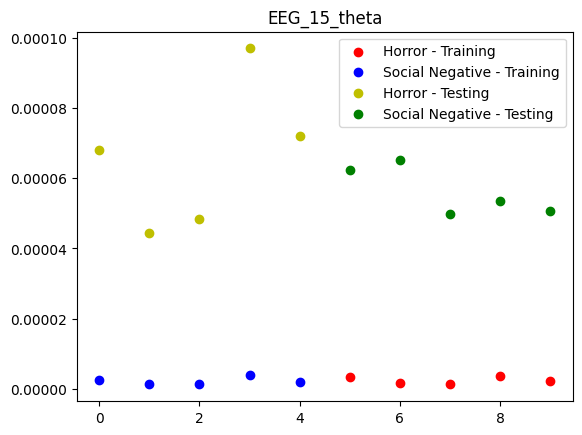

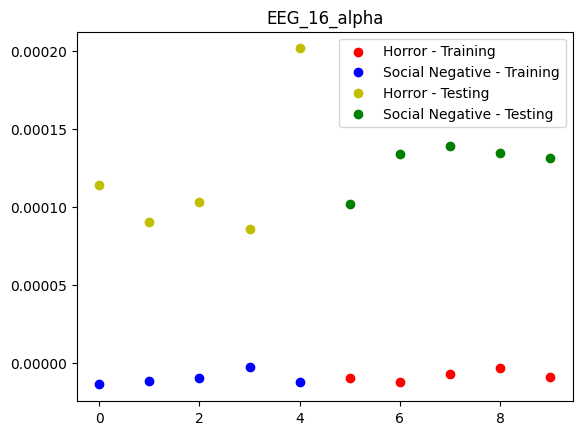

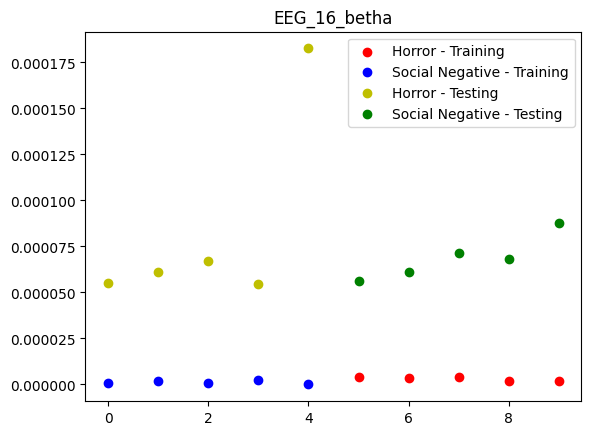

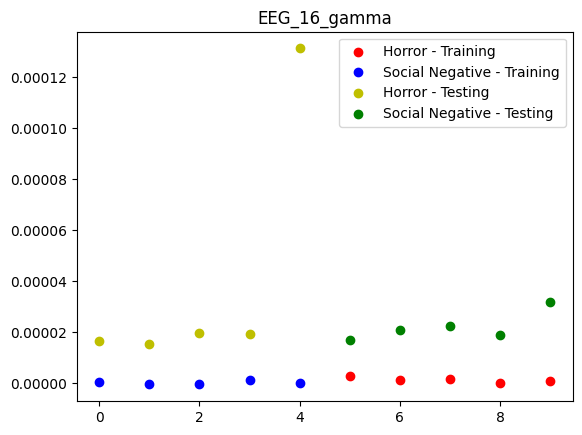

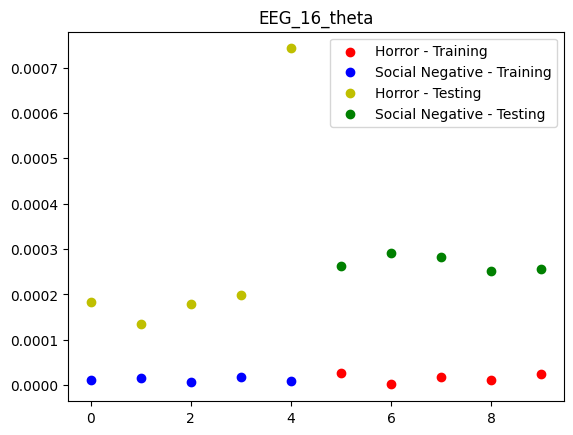

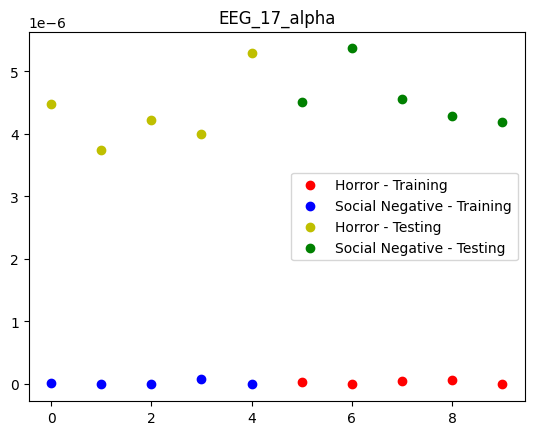

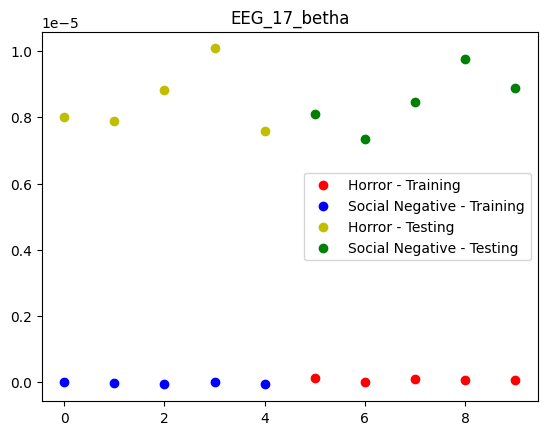

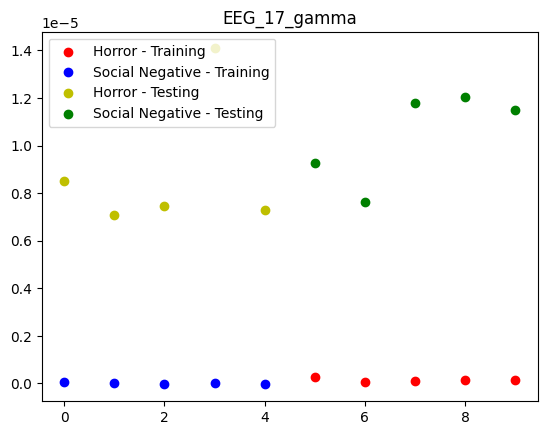

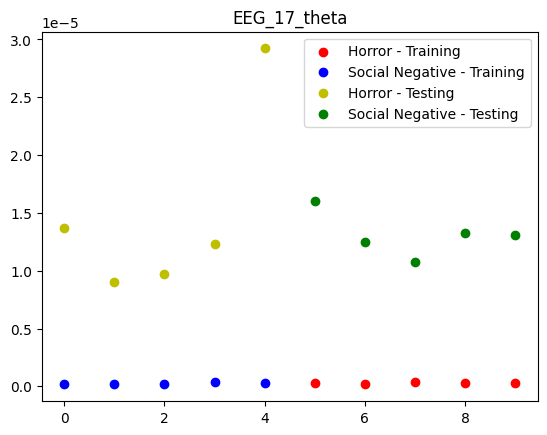

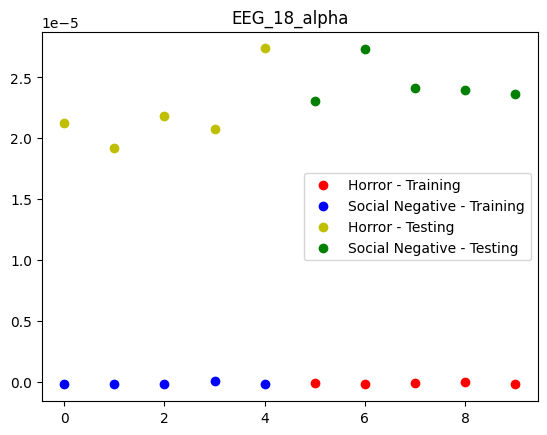

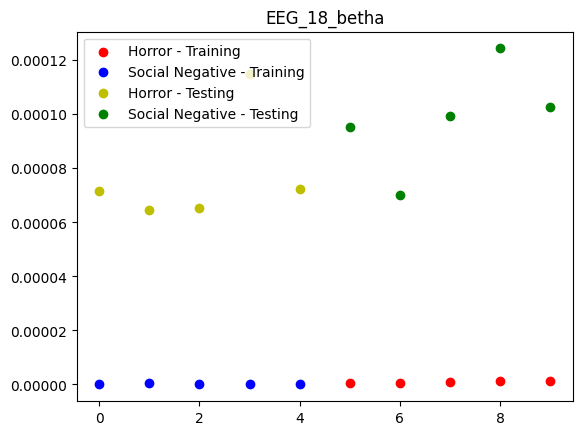

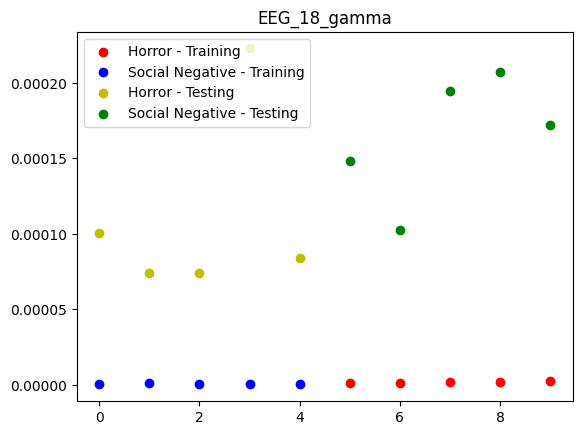

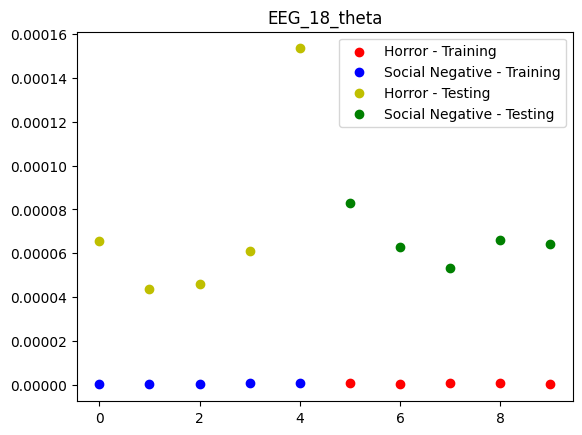

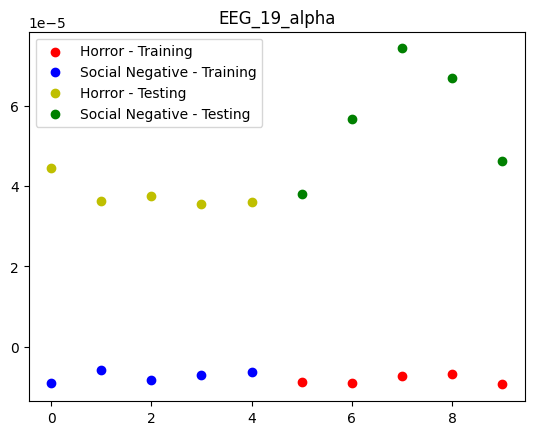

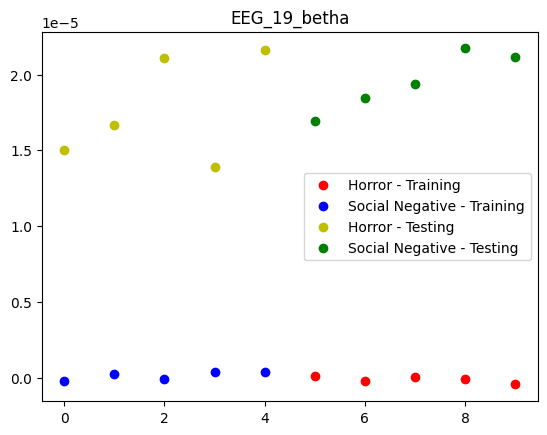

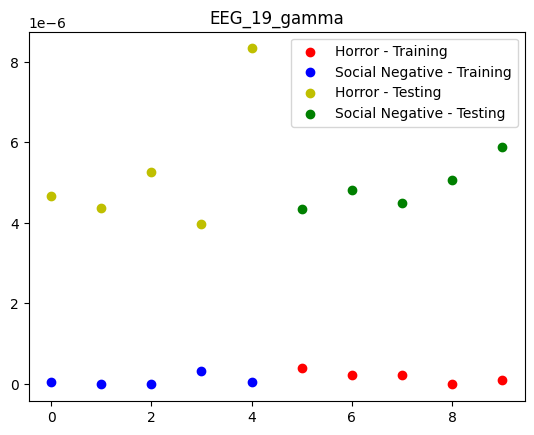

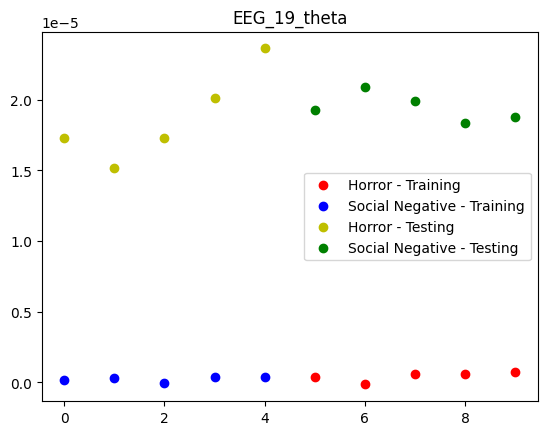

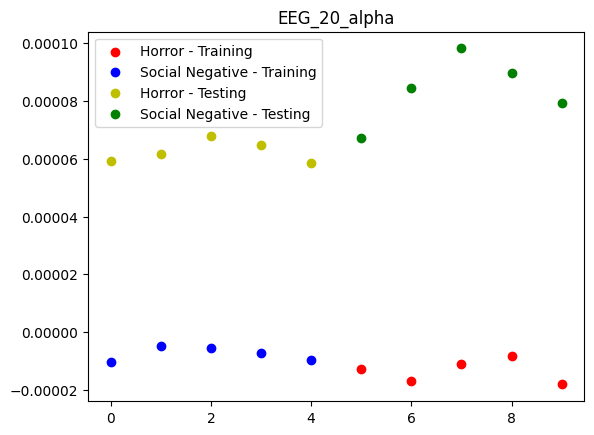

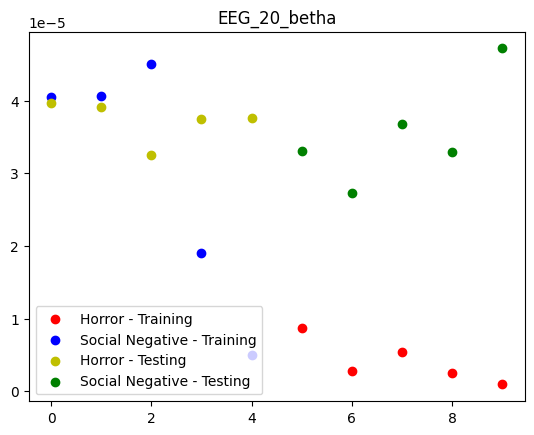

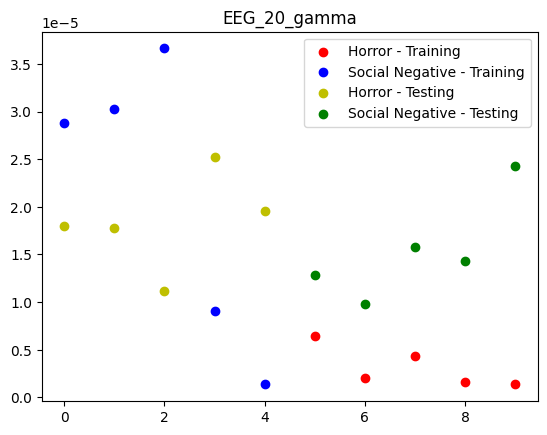

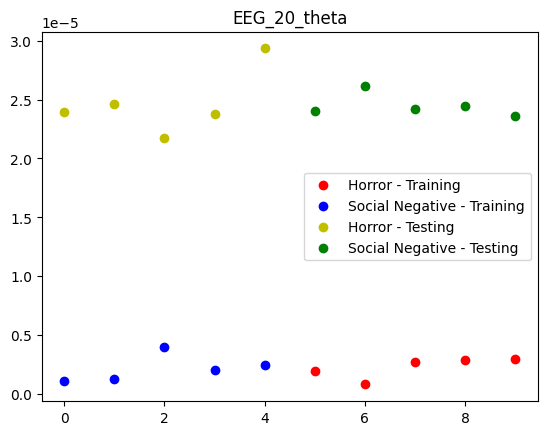

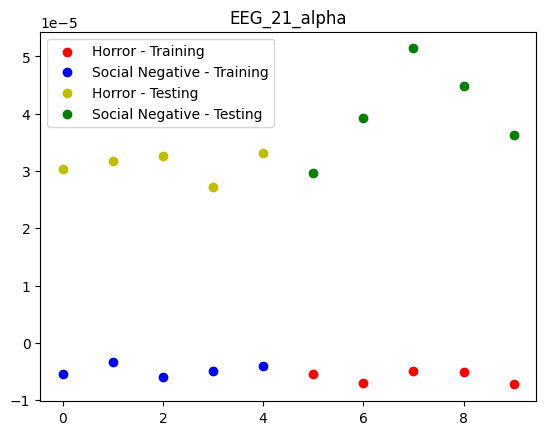

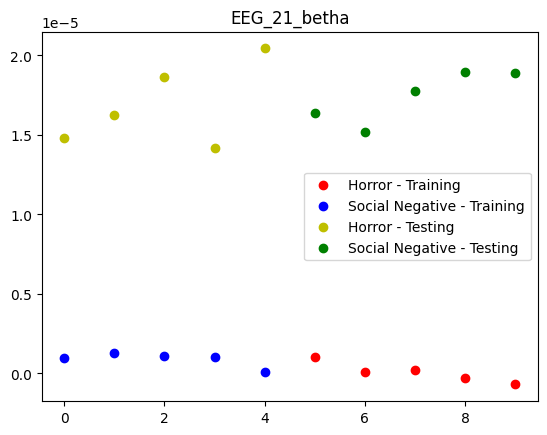

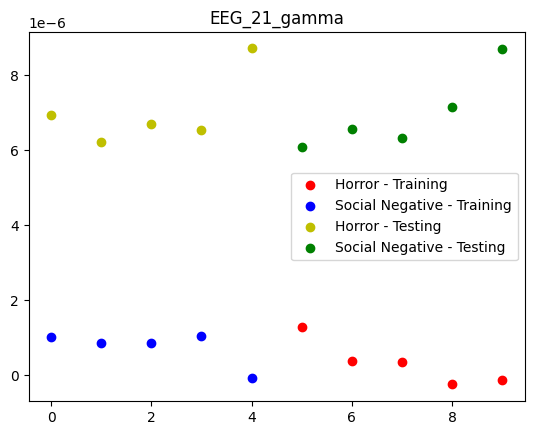

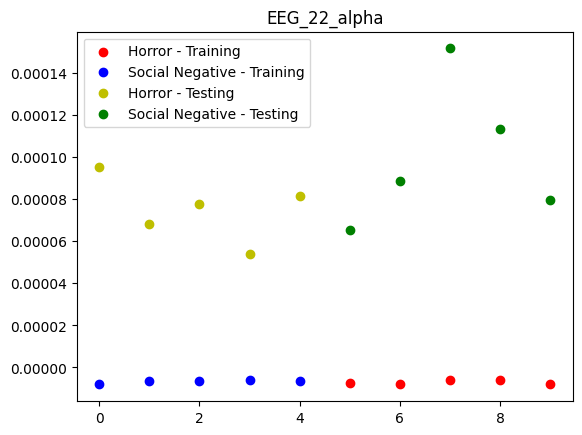

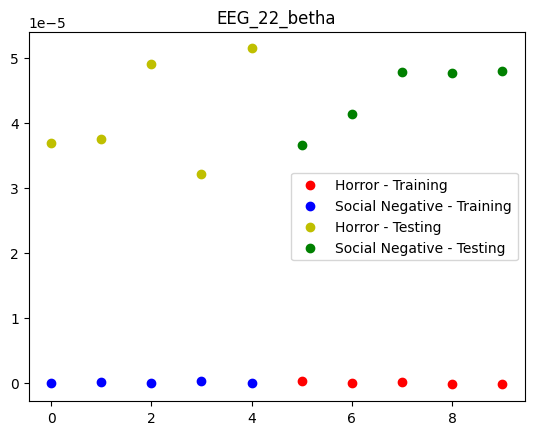

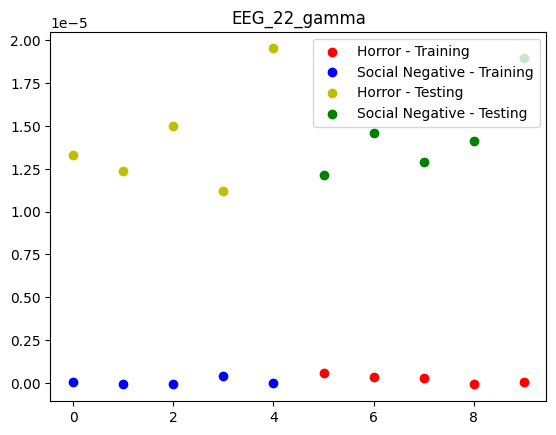

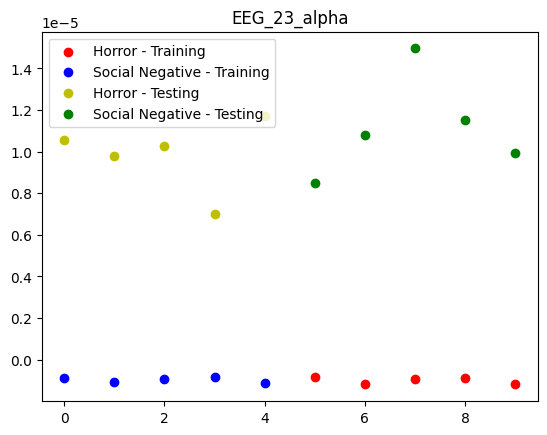

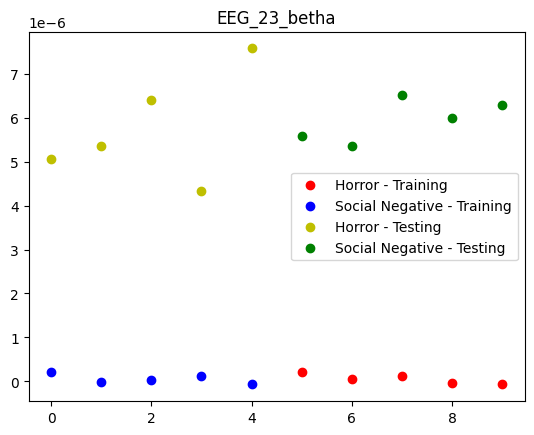

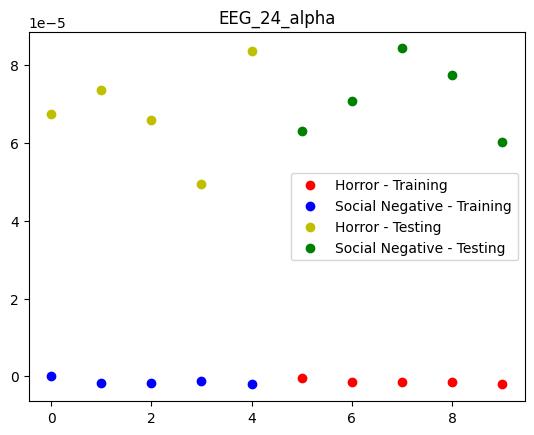

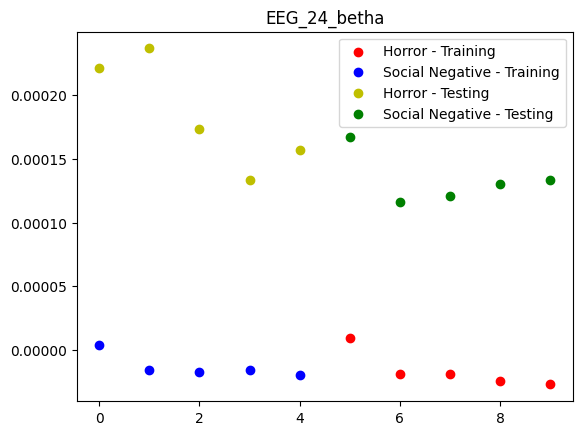

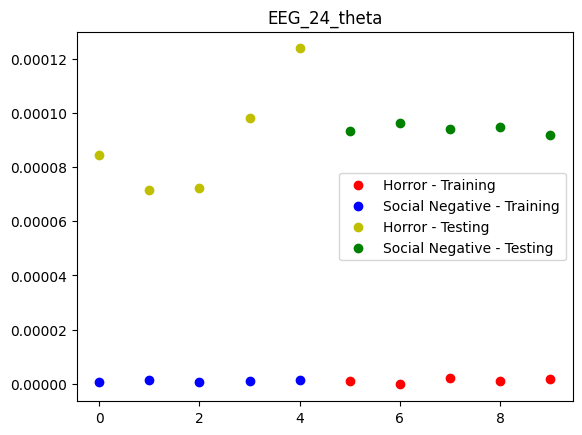

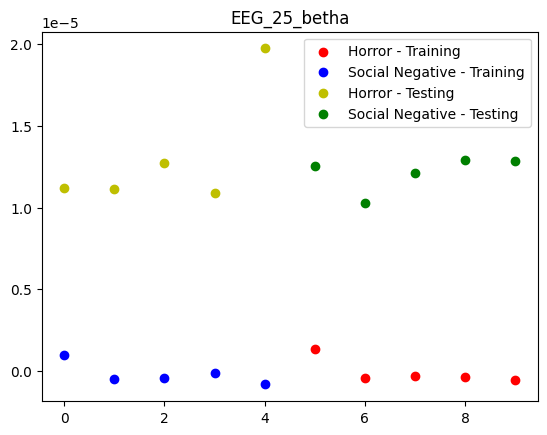

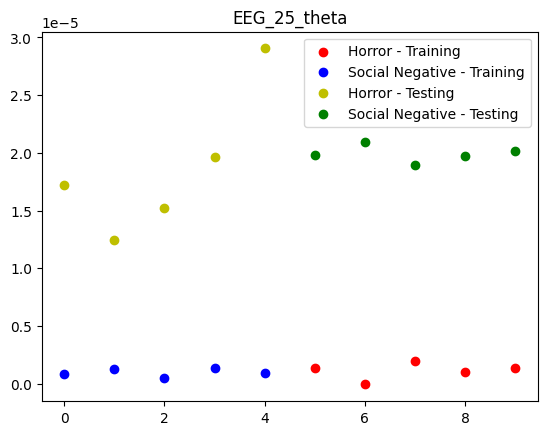

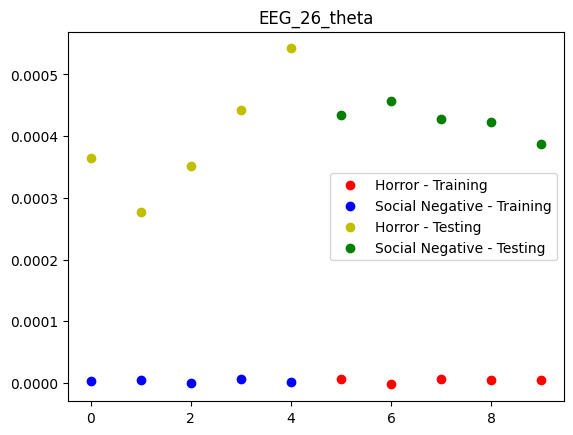

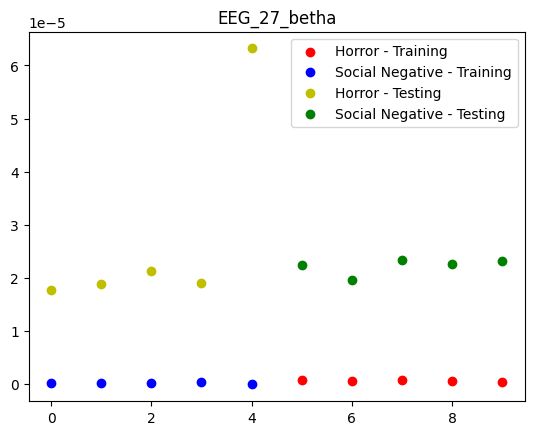

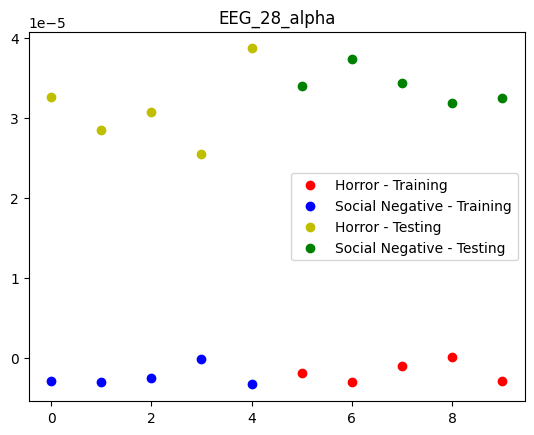

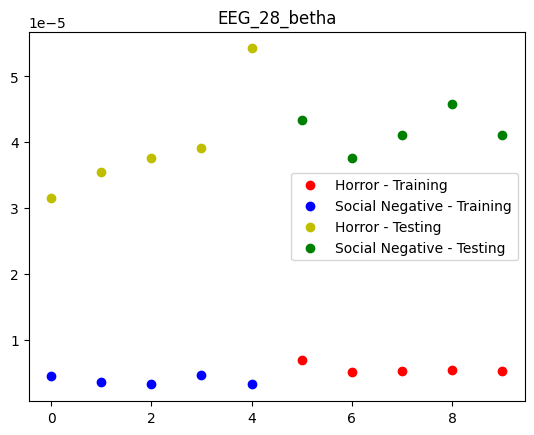

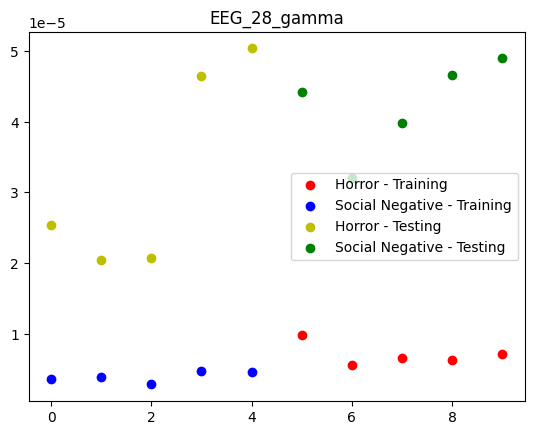

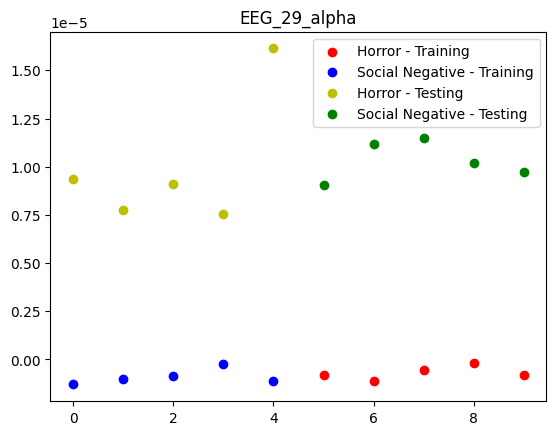

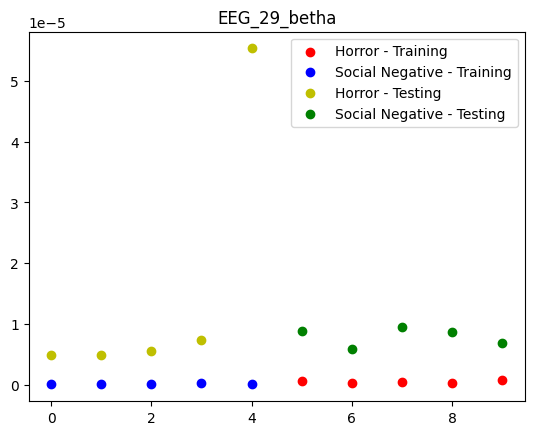

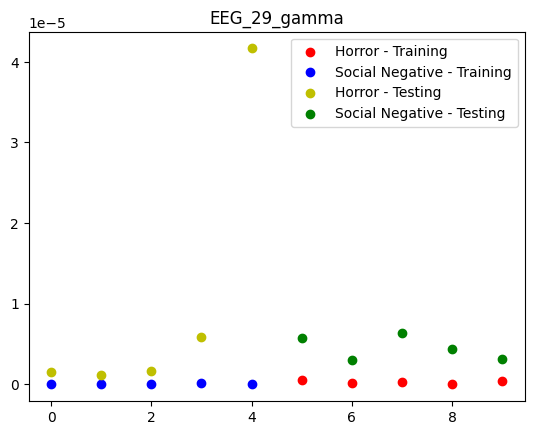

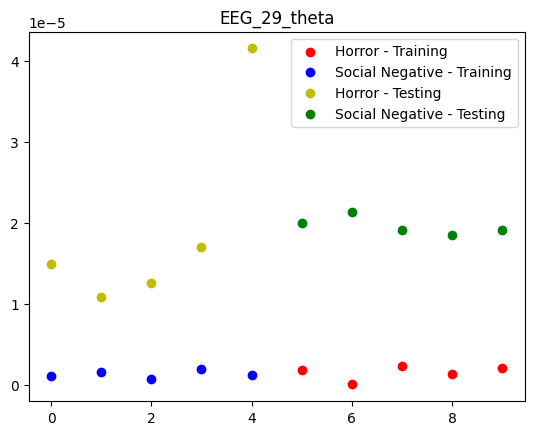

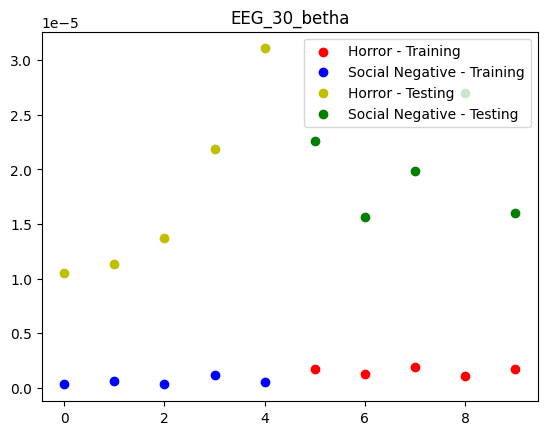

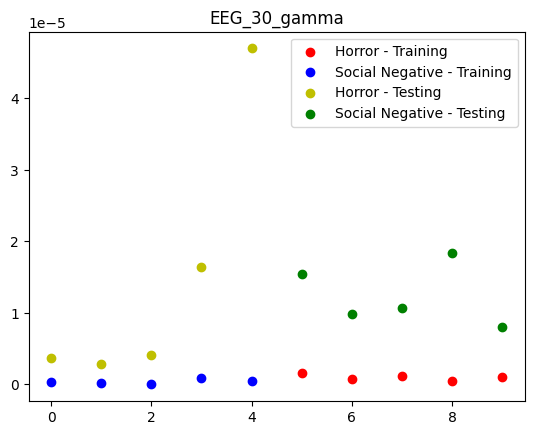

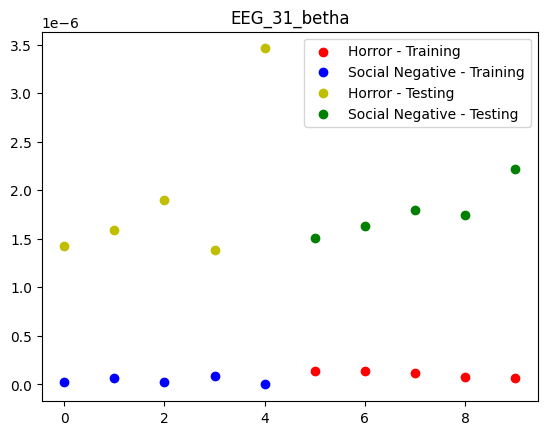

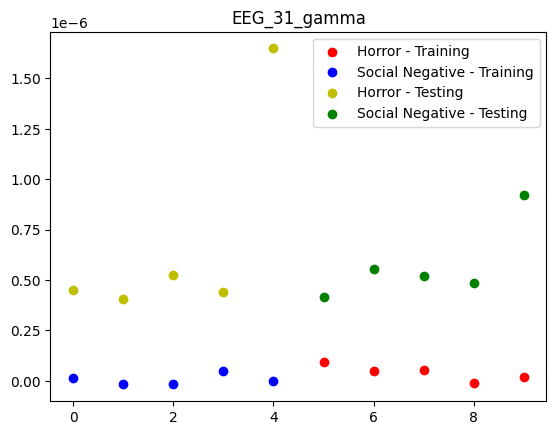

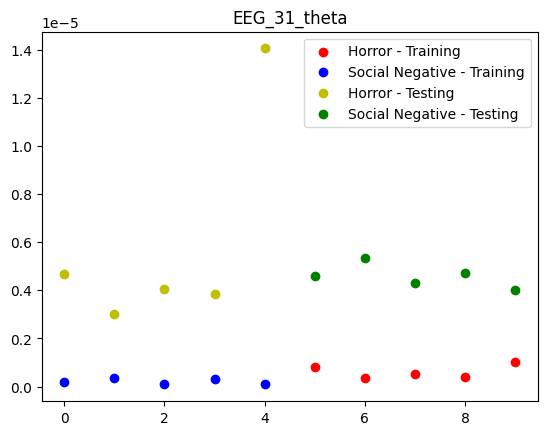

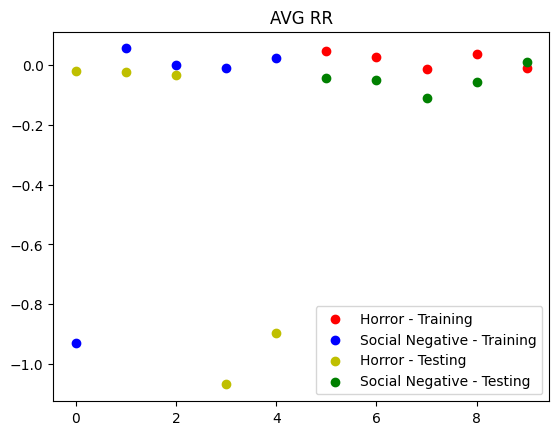

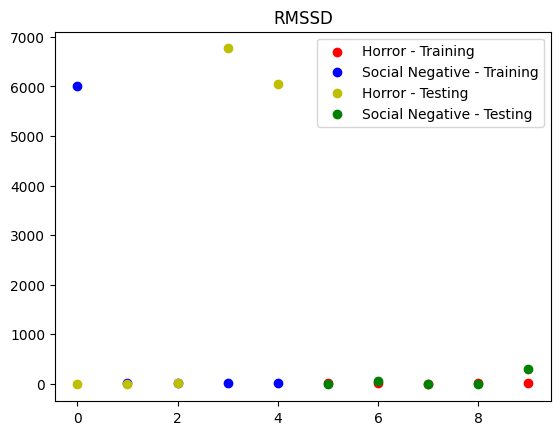

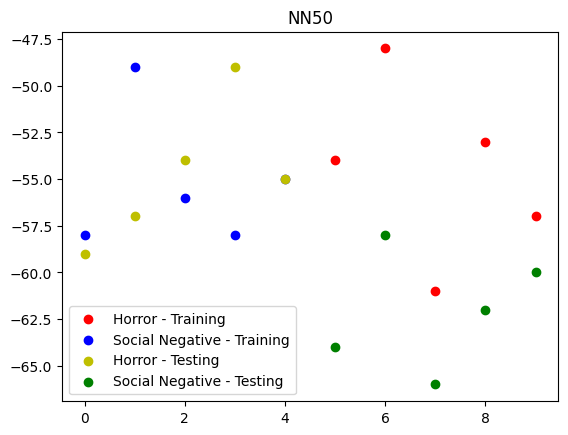

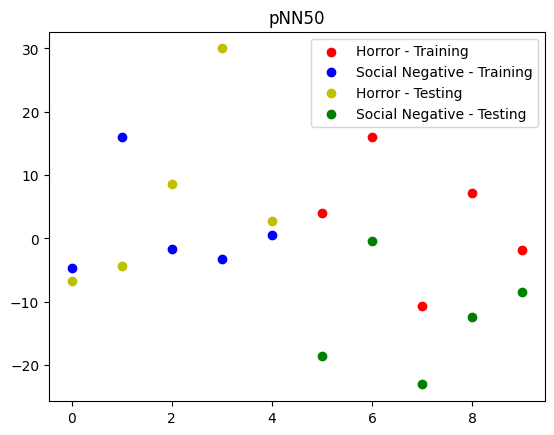

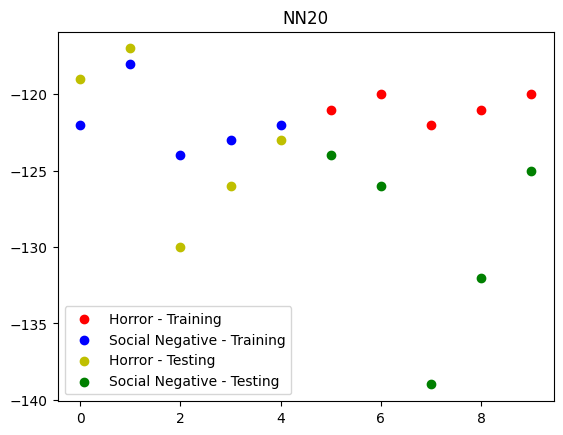

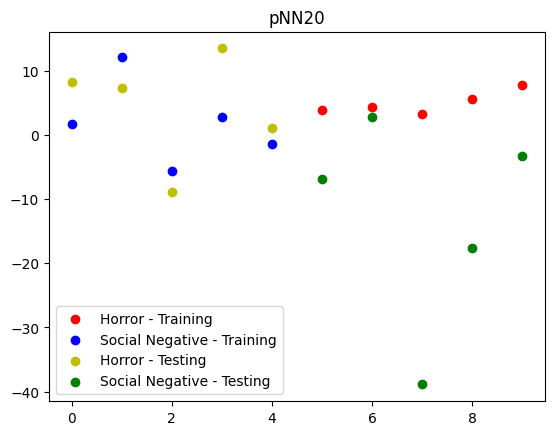

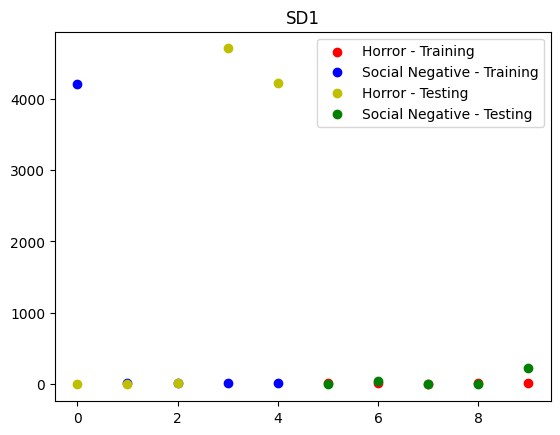

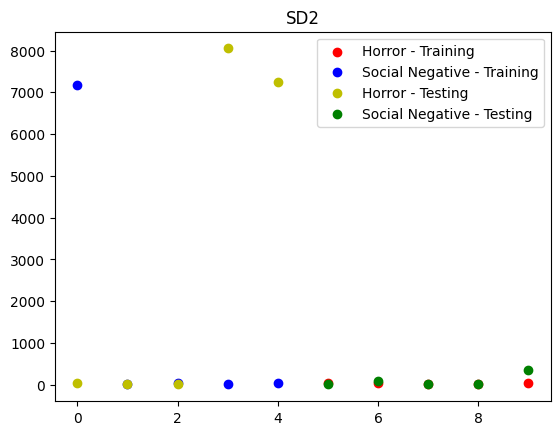

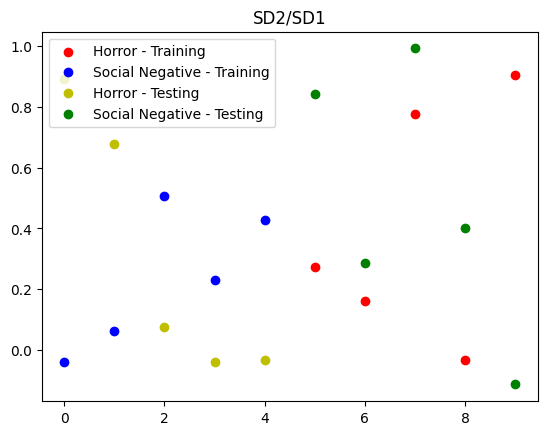

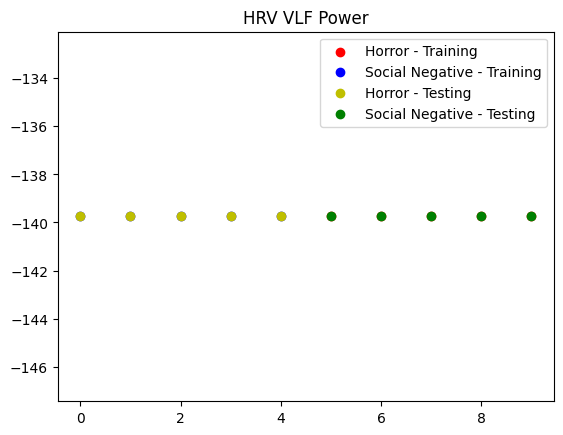

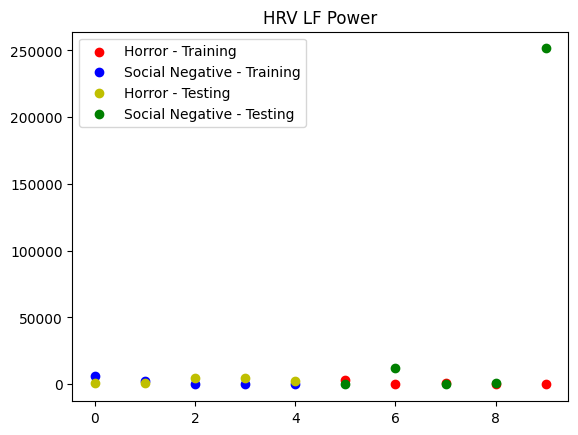

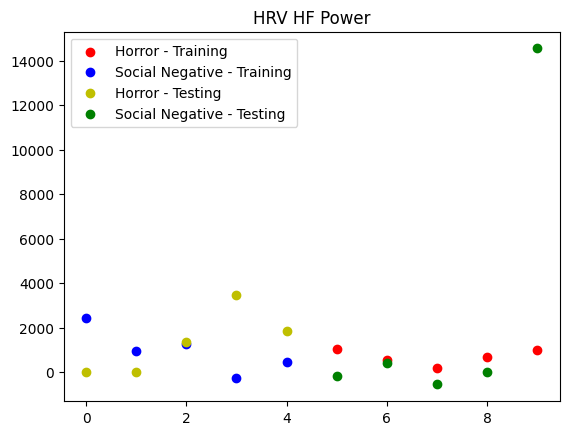

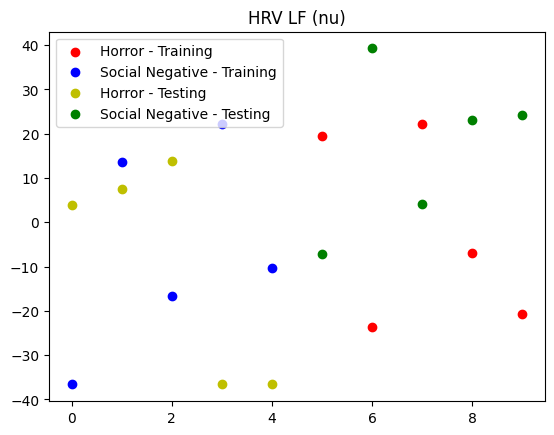

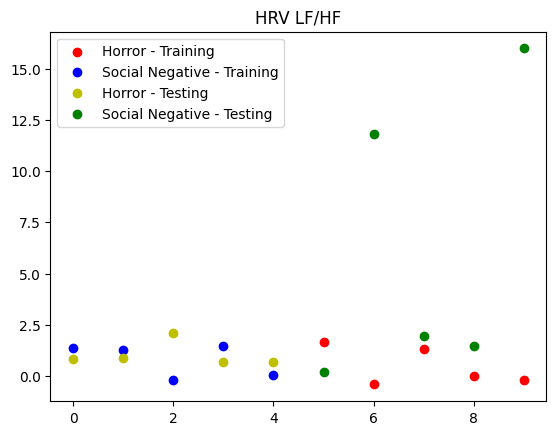

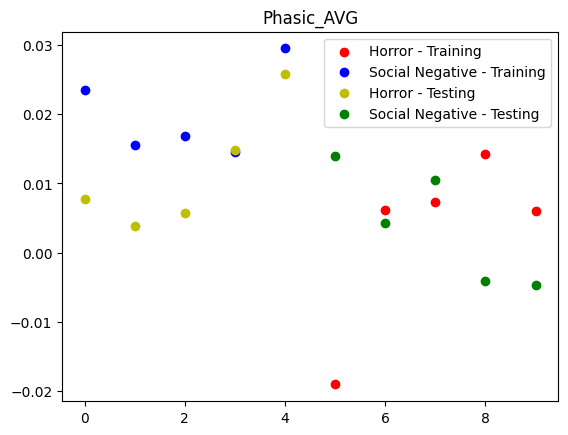

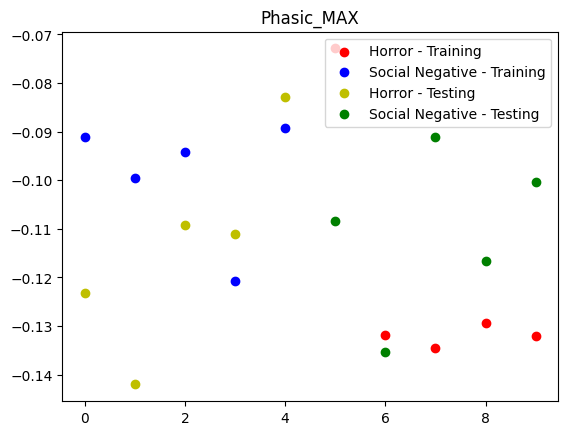

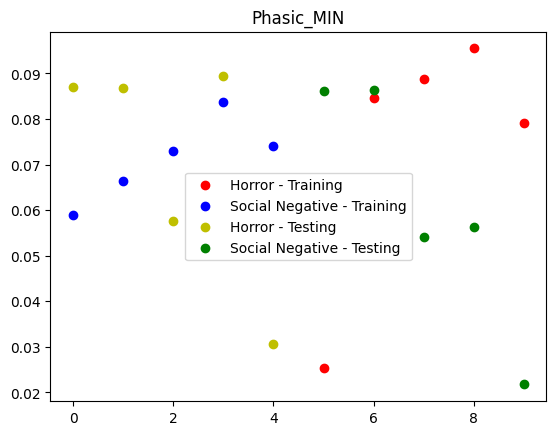

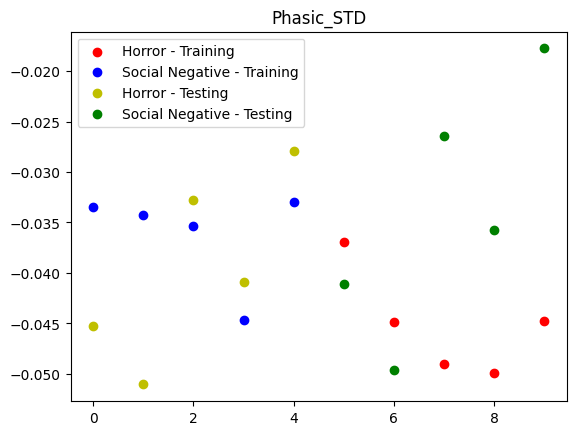

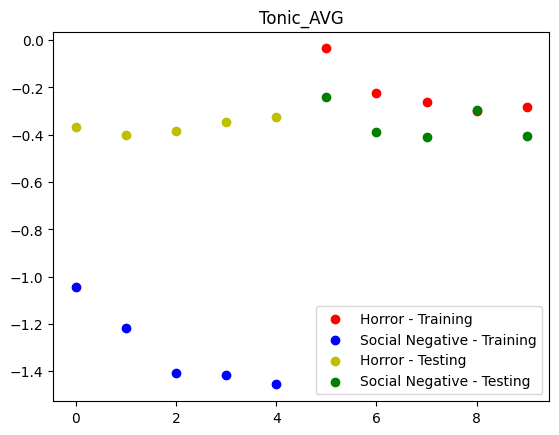

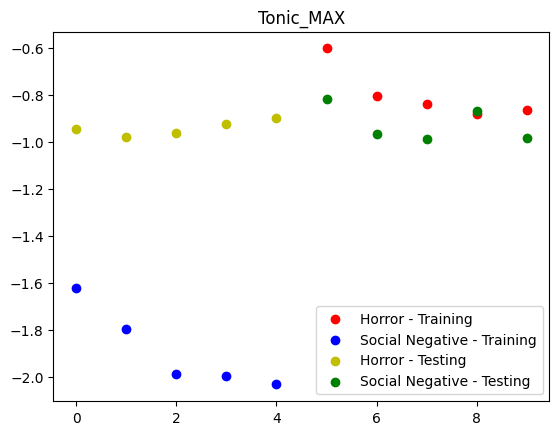

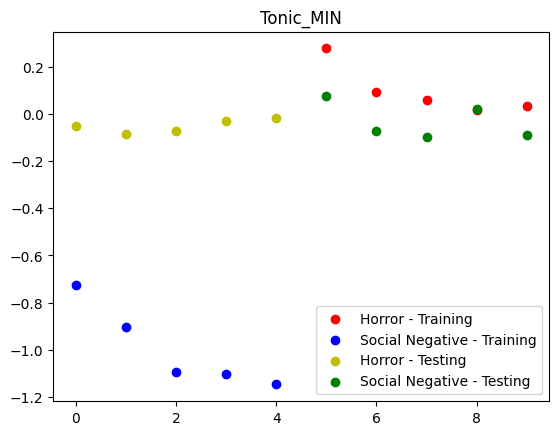

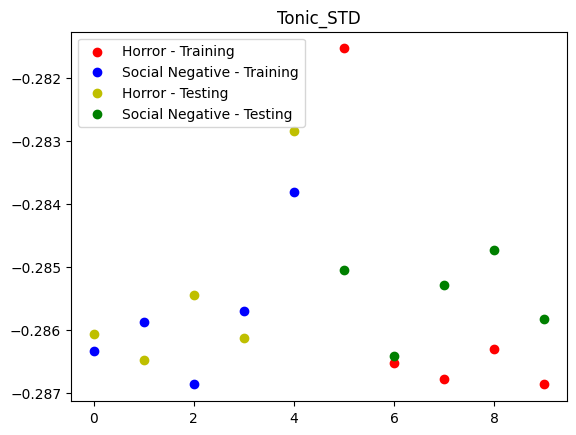

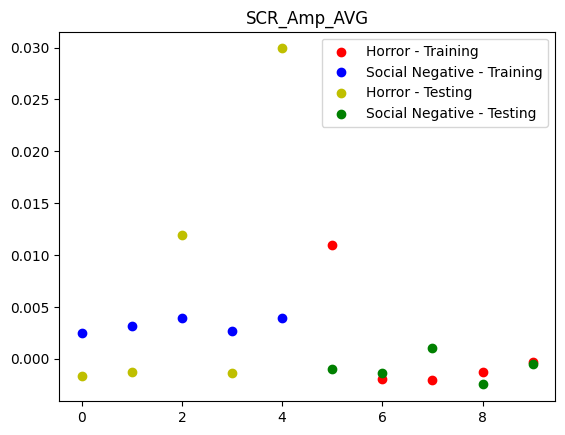

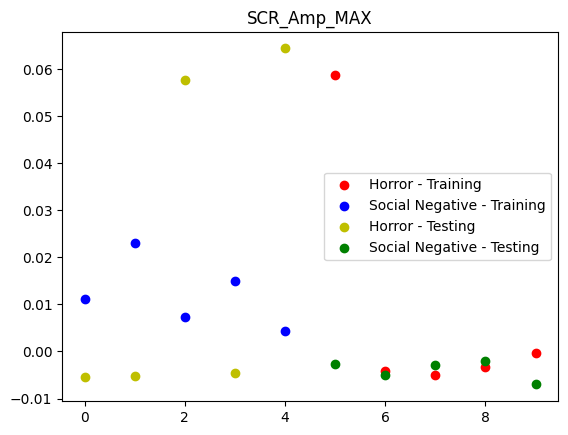

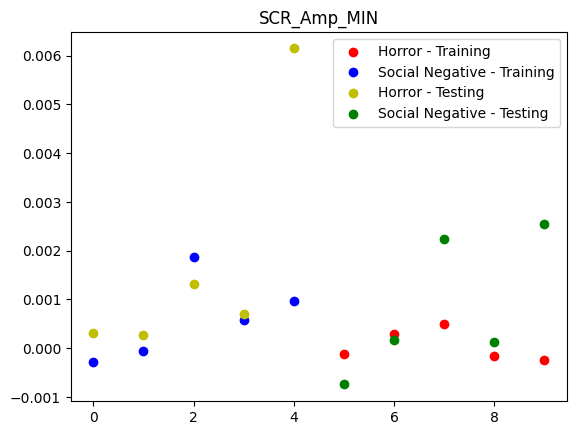

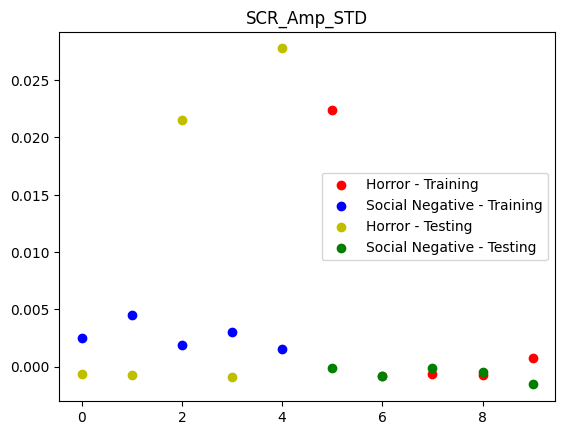

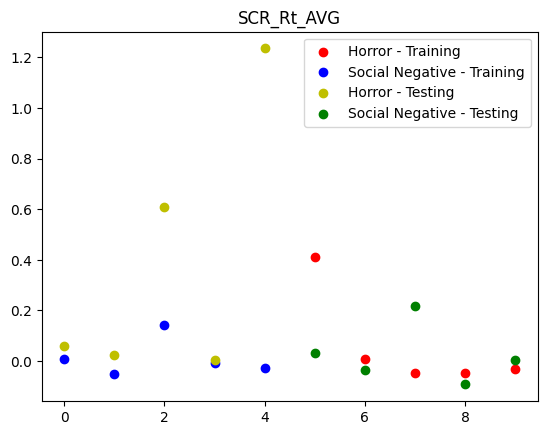

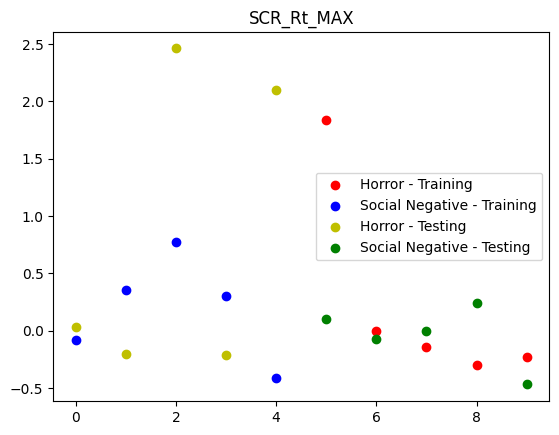

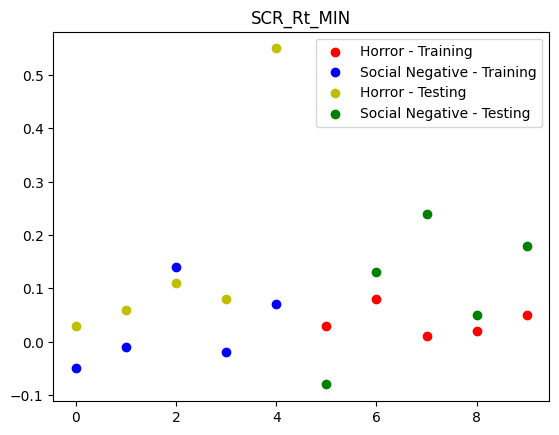

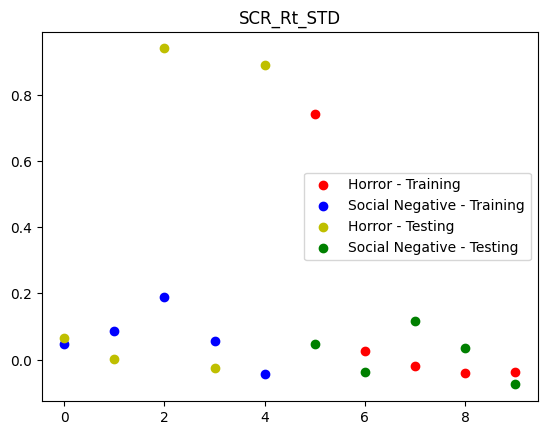

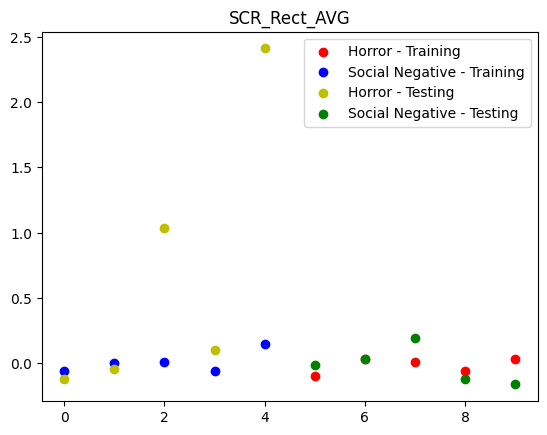

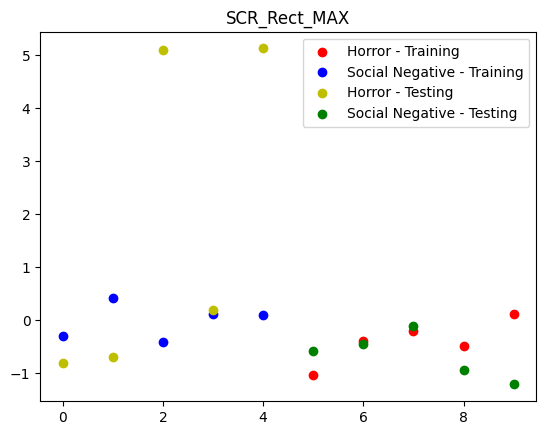

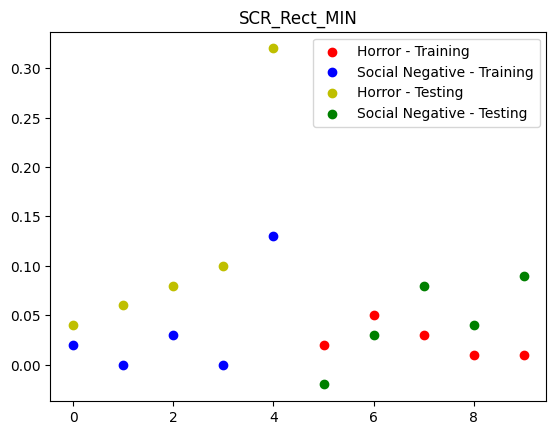

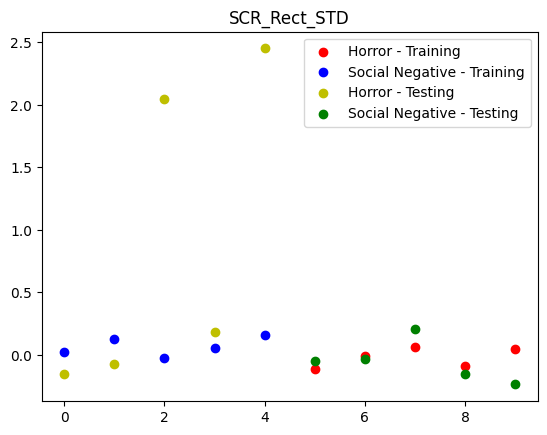

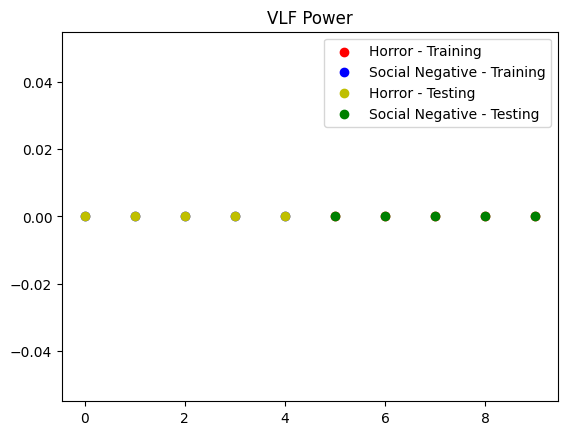

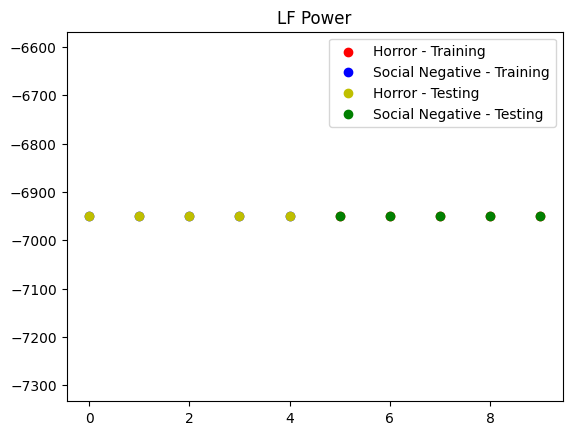

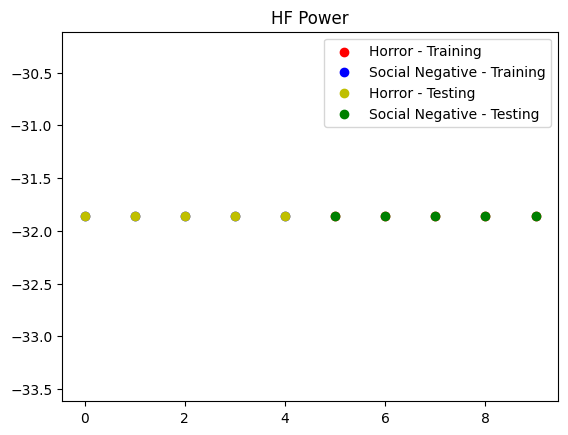

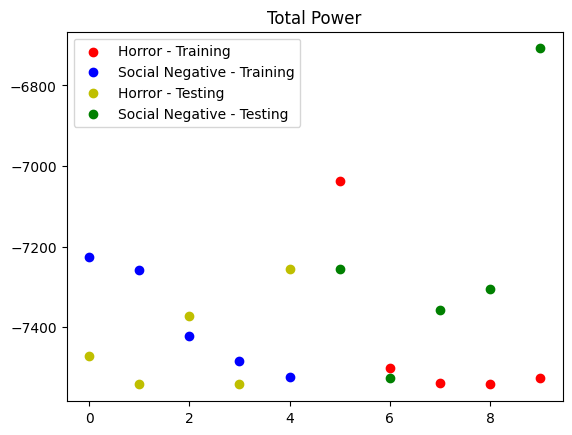

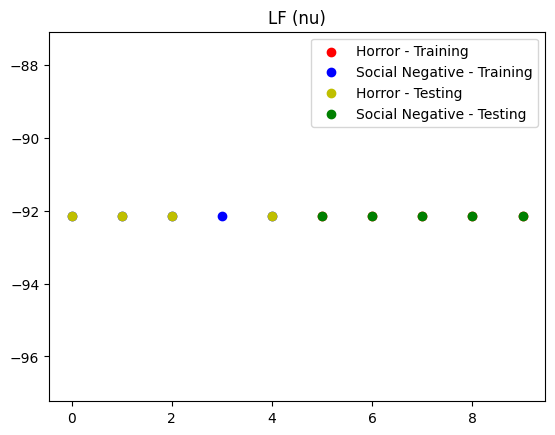

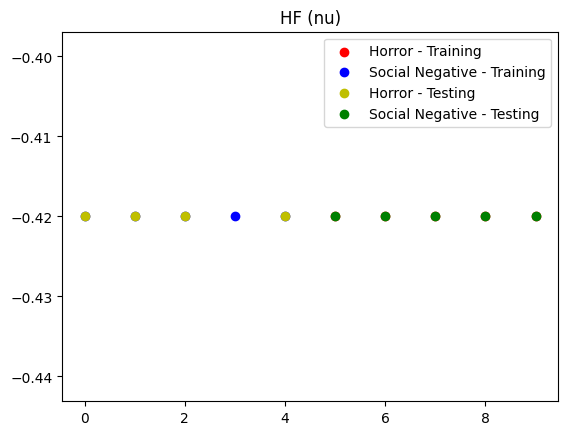

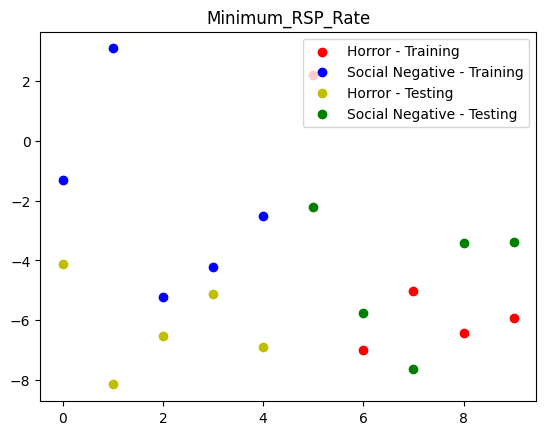

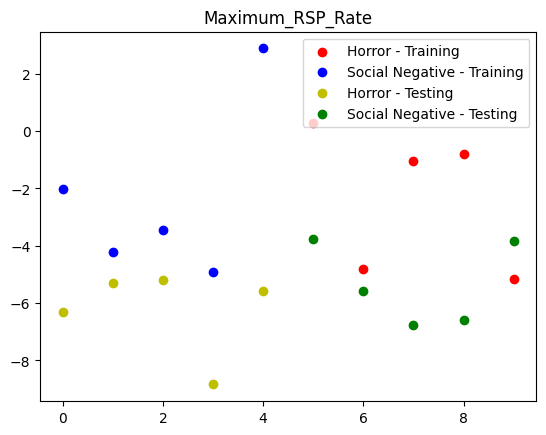

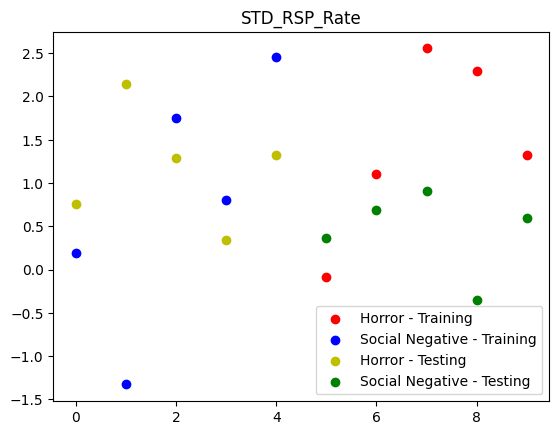

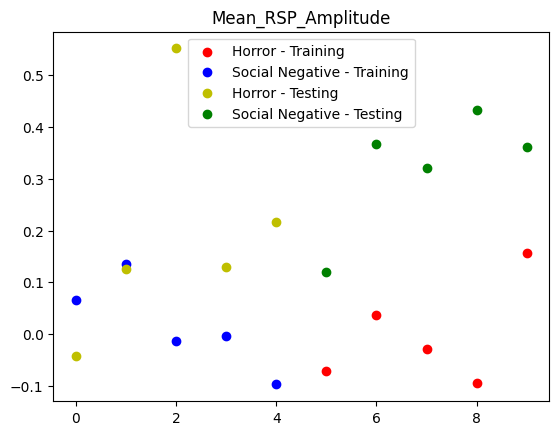

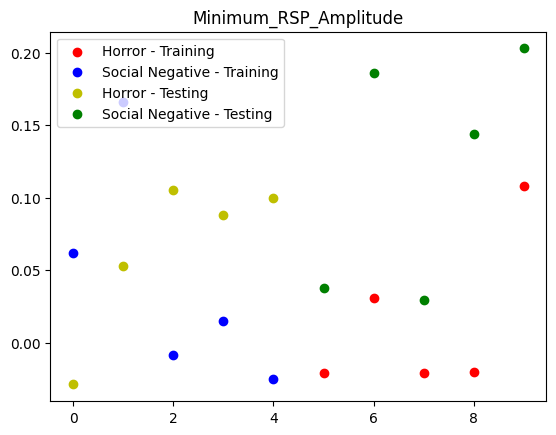

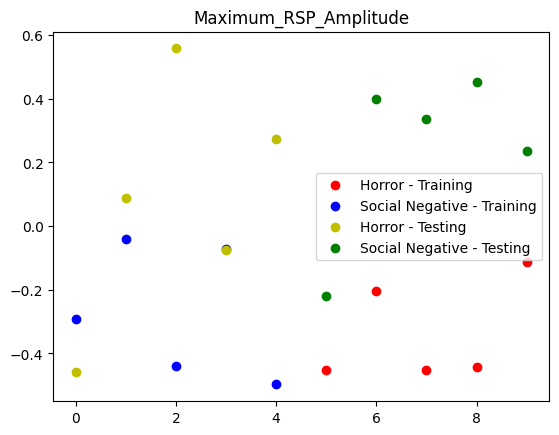

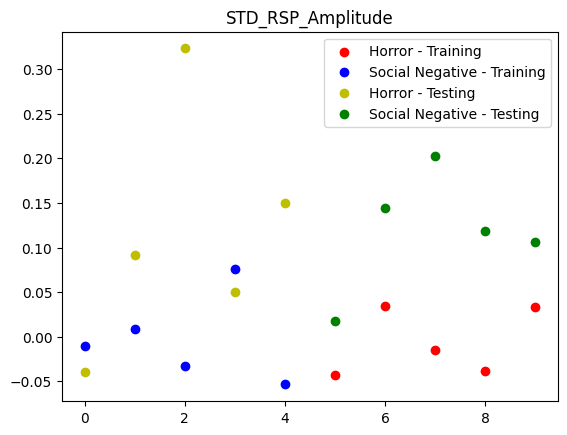

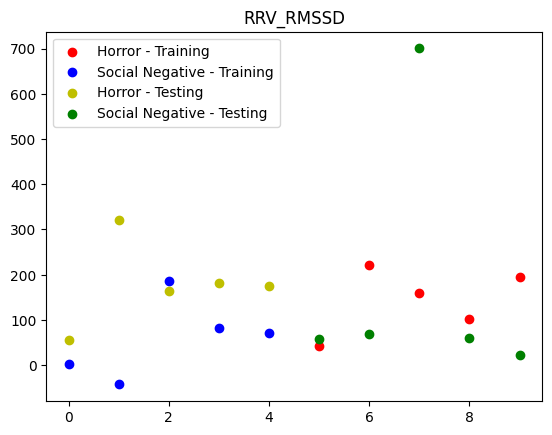

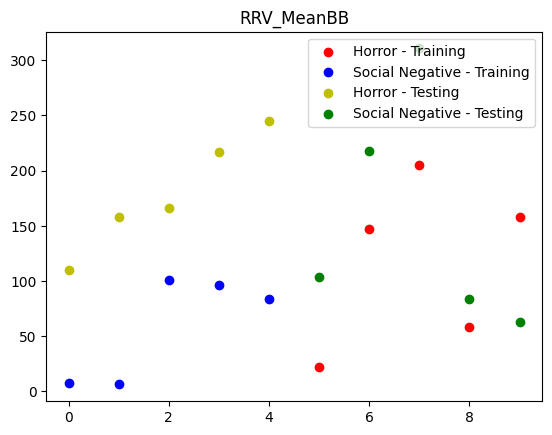

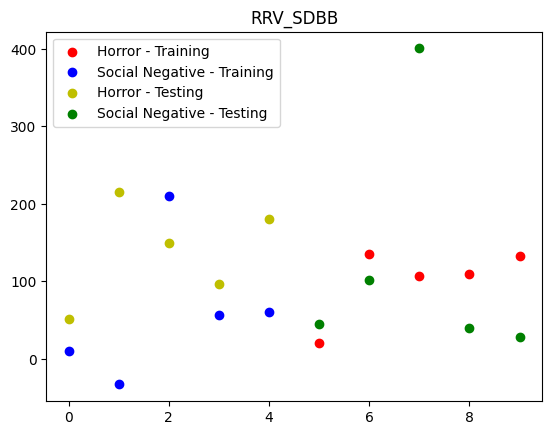

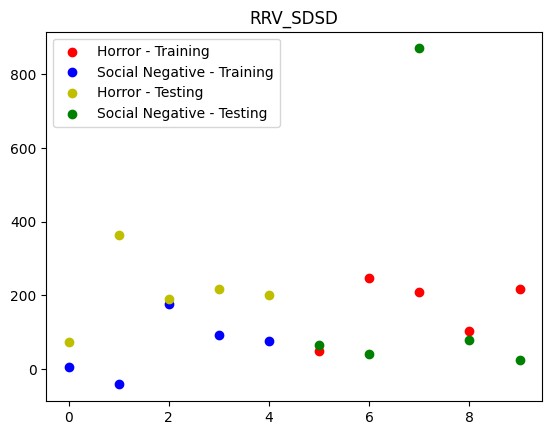

In [67]:
import matplotlib.pyplot as plt
for column in full_columns[rfe.get_support()==True]:
    plt.figure()
    plt.scatter(full_dataframe[column][full_dataframe["Category"]=="Horror"].index,full_dataframe[column][full_dataframe["Category"]=="Horror"],label="Horror - Training",c="r")
    plt.scatter(full_dataframe[column][full_dataframe["Category"]=="Social Negative"].index,full_dataframe[column][full_dataframe["Category"]=="Social Negative"],label="Social Negative - Training",c="b")
    plt.scatter(dataframe[column][dataframe["Category"]=="Horror"].index,dataframe[column][dataframe["Category"]=="Horror"],label="Horror - Testing",c="y")
    plt.scatter(dataframe[column][dataframe["Category"]=="Social Negative"].index,dataframe[column][dataframe["Category"]=="Social Negative"],label="Social Negative - Testing",c="g")
    plt.legend()
    plt.title(column)